In [1]:
import pandas as pd
import json
from datetime import date

In [2]:
file_json_full = 'ftp://atviriduomenys.nvsc.lt/COVID19.json'
json_data_full = pd.read_json(file_json_full)

In [3]:
json_data_full['Susirgimo data'] = pd.to_datetime(json_data_full['Susirgimo data']) #"Start of sickness" 
json_data_full['Atvejo patvirtinimo data'] = pd.to_datetime(json_data_full['Atvejo patvirtinimo data']) #"Positive test date"

In [4]:
display(json_data_full.head(2))
display(json_data_full.info())

,Susirgimo data,Atvejo patvirtinimo data,Įvežtinis,Šalis,Išeitis,Užsienietis,Atvejo amžius,Lytis,Savivaldybė,Ar hospitalizuotas,Gydomas intensyvioje terapijoje,Turi lėtinių ligų
0,2020-03-04,2020-03-16,Taip,Pietų Afrikos Respublika,Mirė,Ne,60-69,Vyras,Panevėžio r.,Taip,Taip,Taip
1,2020-03-13,2020-03-22,Taip,Austrijos Respublika,Pasveiko,Ne,40-49,Vyras,Švenčionių r.,Taip,,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103064 entries, 0 to 103063
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Susirgimo data                   95520 non-null   datetime64[ns]
 1   Atvejo patvirtinimo data         103064 non-null  datetime64[ns]
 2   Įvežtinis                        103064 non-null  object        
 3   Šalis                            103064 non-null  object        
 4   Išeitis                          103064 non-null  object        
 5   Užsienietis                      103064 non-null  object        
 6   Atvejo amžius                    103064 non-null  object        
 7   Lytis                            103064 non-null  object        
 8   Savivaldybė                      103064 non-null  object        
 9   Ar hospitalizuotas               103064 non-null  object        
 10  Gydomas intensyvioje terapijoje  103064 non-

None

In [5]:
"""
display(json_data_full['Įvežtinis'].value_counts())
display(json_data_full['Šalis'].value_counts())
display(json_data_full['Išeitis'].value_counts())
display(json_data_full['Užsienietis'].value_counts())
display(json_data_full['Atvejo amžius'].value_counts())
display(json_data_full['Lytis'].value_counts())
display(json_data_full['Savivaldybė'].value_counts())
display(json_data_full['Ar hospitalizuotas'].value_counts())
display(json_data_full['Gydomas intensyvioje terapijoje'].value_counts())
display(json_data_full['Turi lėtinių ligų'].value_counts())
"""

"\ndisplay(json_data_full['Įvežtinis'].value_counts())\ndisplay(json_data_full['Šalis'].value_counts())\ndisplay(json_data_full['Išeitis'].value_counts())\ndisplay(json_data_full['Užsienietis'].value_counts())\ndisplay(json_data_full['Atvejo amžius'].value_counts())\ndisplay(json_data_full['Lytis'].value_counts())\ndisplay(json_data_full['Savivaldybė'].value_counts())\ndisplay(json_data_full['Ar hospitalizuotas'].value_counts())\ndisplay(json_data_full['Gydomas intensyvioje terapijoje'].value_counts())\ndisplay(json_data_full['Turi lėtinių ligų'].value_counts())\n"

In [6]:
#gender
json_data_full['Lytis'].replace('mot.','Moteris', inplace  = True)
json_data_full['Lytis'].replace('','nėra duomenų', inplace  = True)
display(json_data_full['Lytis'].value_counts())

Moteris         58714
Vyras           43964
nėra duomenų      386
Name: Lytis, dtype: int64

In [7]:
json_data_full['Išeitis'].replace('','nėra duomenų', inplace  = True)
json_data_full['Išeitis'].replace('Kita','nėra duomenų', inplace  = True)
display(json_data_full['Išeitis'].value_counts())

Gydomas         56424
Pasveiko        45195
Mirė              937
nėra duomenų      489
Nesirgo            19
Name: Išeitis, dtype: int64

In [8]:
json_data_full['Atvejo amžius'].replace('','nėra duomenų', inplace  = True)
display(json_data_full['Atvejo amžius'].value_counts())

50-59           21502
40-49           18365
30-39           17344
20-29           13850
60-69           13419
70-79            5395
10-19            4858
80-89            4019
0-9              2985
90-99             996
nėra duomenų      318
100-109            12
120-129             1
Name: Atvejo amžius, dtype: int64

In [9]:
json_data_full['Gydomas intensyvioje terapijoje'].replace('','Ne', inplace  = True)
json_data_full['Turi lėtinių ligų'].replace('','Ne', inplace  = True)
display(json_data_full['Gydomas intensyvioje terapijoje'].value_counts())
display(json_data_full['Turi lėtinių ligų'].value_counts())

Ne      102864
Taip       200
Name: Gydomas intensyvioje terapijoje, dtype: int64

Ne      91879
Taip    11185
Name: Turi lėtinių ligų, dtype: int64

In [10]:
display(json_data_full.head(2))
json_data_full = json_data_full[json_data_full['Išeitis'] != 'Nesirgo']

,Susirgimo data,Atvejo patvirtinimo data,Įvežtinis,Šalis,Išeitis,Užsienietis,Atvejo amžius,Lytis,Savivaldybė,Ar hospitalizuotas,Gydomas intensyvioje terapijoje,Turi lėtinių ligų
0,2020-03-04,2020-03-16,Taip,Pietų Afrikos Respublika,Mirė,Ne,60-69,Vyras,Panevėžio r.,Taip,Taip,Taip
1,2020-03-13,2020-03-22,Taip,Austrijos Respublika,Pasveiko,Ne,40-49,Vyras,Švenčionių r.,Taip,Ne,Ne


In [11]:
covid_grouped = json_data_full.groupby(['Atvejo patvirtinimo data', 'Išeitis']).agg({'Išeitis':'count'}).rename(columns={'Išeitis':'Total_Number'}).reset_index()
covid_table = covid_grouped.pivot_table(index=['Atvejo patvirtinimo data'], 
                    columns='Išeitis', 
                    values='Total_Number',
                    fill_value=0).reset_index(drop=False)


covid_table = covid_table[['Atvejo patvirtinimo data','Gydomas', 'Pasveiko','Mirė', 'nėra duomenų']]
covid_table['Total per day'] = covid_table['Gydomas']+covid_table['Pasveiko']+covid_table['Mirė']+covid_table['nėra duomenų']
covid_table['Running: currently sick'] = covid_table['Gydomas'].cumsum(skipna = True)
covid_table['Running: recovered'] = covid_table['Pasveiko'].cumsum(skipna = True)
covid_table['Running: died'] = covid_table['Mirė'].cumsum(skipna = True)
covid_table['Running: unknown'] = covid_table['nėra duomenų'].cumsum(skipna = True)
covid_table['Running: Total'] = covid_table['Running: currently sick']+covid_table['Running: recovered']+covid_table['Running: died']+covid_table['Running: unknown']
covid_table['Running: Completed'] = covid_table['Running: recovered']+covid_table['Running: died']


display(covid_table.tail(10))


Išeitis,Atvejo patvirtinimo data,Gydomas,Pasveiko,Mirė,nėra duomenų,Total per day,Running: currently sick,Running: recovered,Running: died,Running: unknown,Running: Total,Running: Completed
272,2020-12-07,1022,348,14,8,1392,31994,44150,863,444,77451,45013
273,2020-12-08,2618,496,4,8,3126,34612,44646,867,452,80577,45513
274,2020-12-09,3031,267,20,7,3325,37643,44913,887,459,83902,45800
275,2020-12-10,2906,153,8,6,3073,40549,45066,895,465,86975,45961
276,2020-12-11,3215,68,11,8,3302,43764,45134,906,473,90277,46040
277,2020-12-12,2787,38,9,6,2840,46551,45172,915,479,93117,46087
278,2020-12-13,1901,14,2,2,1919,48452,45186,917,481,95036,46103
279,2020-12-14,1420,5,7,2,1434,49872,45191,924,483,96470,46115
280,2020-12-15,3400,4,7,6,3417,53272,45195,931,489,99887,46126
281,2020-12-16,3152,0,6,0,3158,56424,45195,937,489,103045,46132


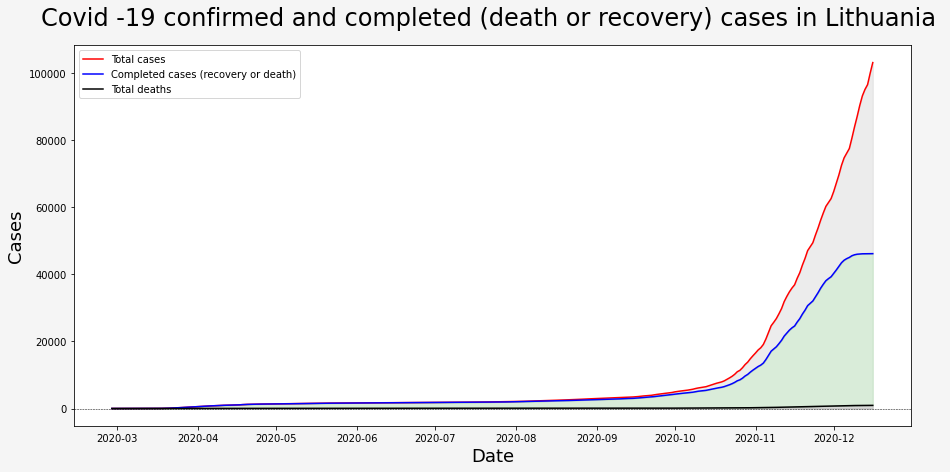

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

ax.plot(covid_table['Atvejo patvirtinimo data'], covid_table['Running: Total'] , color = "red", label='Total cases')
ax.plot(covid_table['Atvejo patvirtinimo data'], covid_table['Running: Completed'], color = "blue", label = "Completed cases (recovery or death)")
ax.plot(covid_table['Atvejo patvirtinimo data'], covid_table['Running: died'], color = "Black", label='Total deaths')

ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Cases',fontsize=18)
ax.set_title("Covid -19 confirmed and completed (death or recovery) cases in Lithuania " , fontsize=24, pad=20)

X = np.array(covid_table['Atvejo patvirtinimo data'])

Y1 = np.array(covid_table['Running: Total'])
Y2 = np.array(covid_table['Running: Completed'])
Y3 = np.array(covid_table['Running: died'])
ax.fill_between(X, Y1,Y2,color='grey',alpha=.15)
ax.fill_between(X, Y2,Y3,color='green',alpha=.15)
ax.fill_between(X, Y3,0,color='black',alpha=.15)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.legend()
plt.show()

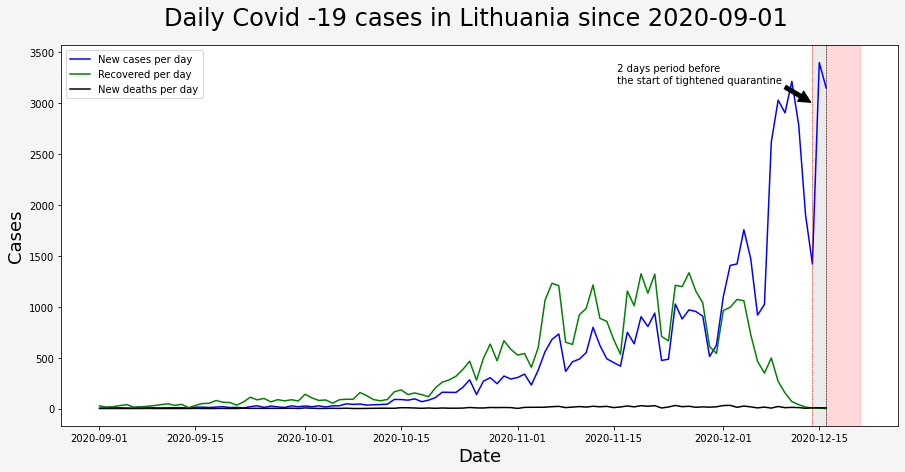

In [17]:
import matplotlib.pyplot as plt
import numpy as np

covid_table09 = covid_table[covid_table['Atvejo patvirtinimo data']>='2020-09-01']
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

ax.plot(covid_table09['Atvejo patvirtinimo data'], covid_table09["Gydomas"] , color = "blue", label='New cases per day')
ax.plot(covid_table09['Atvejo patvirtinimo data'], covid_table09['Pasveiko'], color = "green", label = "Recovered per day")
ax.plot(covid_table09['Atvejo patvirtinimo data'], covid_table09['Mirė'], color = "black", label='New deaths per day')

ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Cases',fontsize=18)
ax.set_title("Daily Covid -19 cases in Lithuania since 2020-09-01 " , fontsize=24, pad=20)


plt.axvline(x = date(2020,12,14), color='red', linestyle='--', linewidth=0.5) #start of tightened quarantine
plt.axvline(x = date(2020,12,16), color='black', linestyle='--', linewidth=0.5) #start of tightened quarantine

ax.axvspan(date(2020,12,14), date(2020,12,16), alpha=0.15, color='grey')
ax.axvspan(date(2020,12,16), date(2020,12,21), alpha=0.15, color='red')
ax.legend()

plt.annotate(' 2 days period before \n the start of tightened quarantine'
             ,xy = (date(2020,12,14),3000)
             ,xytext = (date(2020,11,15),3200),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [14]:
mobility_csv_file = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
c_size = 5000

mobility_dataLT = None
for chunk in pd.read_csv(mobility_csv_file,chunksize=c_size, parse_dates=['date']):
    chunk_result =  chunk[chunk['country_region']=="Lithuania"]
    
    if mobility_dataLT is None:
        mobility_dataLT = chunk_result
    else:
        mobility_dataLT = mobility_dataLT.append(chunk_result)

print(mobility_dataLT.shape)


(17750, 14)


In [15]:
mobility_data_melted = pd.melt(mobility_dataLT, id_vars = ['country_region', 'sub_region_1', 'date'], 
                              value_vars = ['retail_and_recreation_percent_change_from_baseline',
                                            'grocery_and_pharmacy_percent_change_from_baseline',
                                            'parks_percent_change_from_baseline',
                                            'transit_stations_percent_change_from_baseline',
                                            'workplaces_percent_change_from_baseline',
                                            'residential_percent_change_from_baseline'])
display(mobility_data_melted.tail())


,country_region,sub_region_1,date,variable,value
106495,Lithuania,Vilnius County,2020-12-09,residential_percent_change_from_baseline,14.0
106496,Lithuania,Vilnius County,2020-12-10,residential_percent_change_from_baseline,14.0
106497,Lithuania,Vilnius County,2020-12-11,residential_percent_change_from_baseline,14.0
106498,Lithuania,Vilnius County,2020-12-12,residential_percent_change_from_baseline,6.0
106499,Lithuania,Vilnius County,2020-12-13,residential_percent_change_from_baseline,3.0


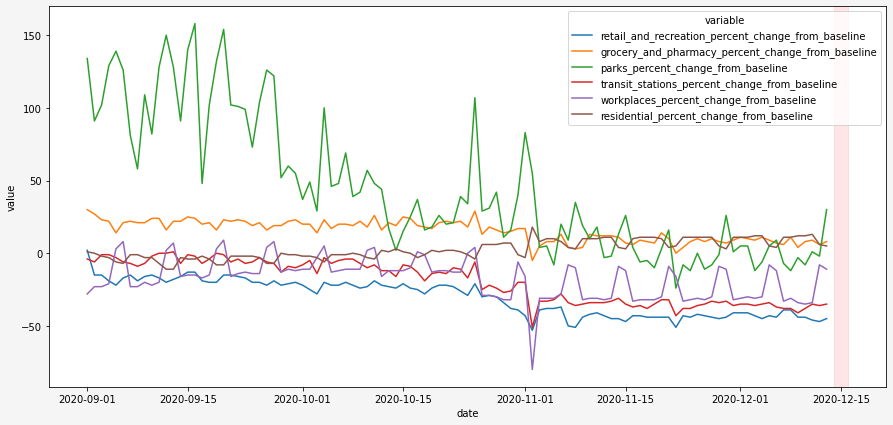

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

#Selected aggregated data of Lithuania
mobility_data_melted = mobility_data_melted[mobility_data_melted['sub_region_1'].isna()] 
#Selected aggregated data of Lithuania from '2020-09-01'
mobility_data_melted09 = mobility_data_melted[mobility_data_melted['date']>='2020-09-01']

sns.lineplot(x= 'date',y ='value', data = mobility_data_melted09, hue = 'variable' )
ax.axvspan(date(2020,12,14), date(2020,12,16), alpha=0.1, color='red')